In [2]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# Add the src folder to the Python path
import sys
sys.path.append("../src")

# Import your test functions
from utils.tests import chi_square_test, t_test_analysis

##autoreload imports 
%load_ext autoreload
%autoreload 2

from src.utils.features_extension import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the preprocessed data

In [3]:
data = pd.read_csv(r"..\data\preprocessed_data.csv")
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [4]:

target = 'Churn'

# Continuous numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Binary features = all other columns except numeric and target
binary_features = [col for col in data.columns if col not in numeric_features + [target]]

# Run tests
t_test_table = t_test_analysis(data, target, numeric_features)
chi_square_table = chi_square_test(data, target, binary_features)

# Display both tables separately
print("===== T-Test Results =====")
display(t_test_table.sort_values('p-value'))

print("===== Chi-Square Test Results =====")
display(chi_square_table.sort_values('p-value'))


===== T-Test Results =====


,Feature,Test,p-value,Reject_H0,Relationship_Strength
0,tenure,T-Test,0.0,Yes,Significant
1,MonthlyCharges,T-Test,0.0,Yes,Significant
2,TotalCharges,T-Test,0.0,Yes,Significant


===== Chi-Square Test Results =====


,Feature,Test,p-value,Reject_H0,Cramer_V,Relationship_Strength
13,OnlineBackup_Yes,Chi-Square,0.0000,Yes,0.0819,Very Weak
24,PaymentMethod_Credit card (automatic),Chi-Square,0.0000,Yes,0.1339,Weak
23,Contract_Two year,Chi-Square,0.0000,Yes,0.3019,Moderate
22,Contract_One year,Chi-Square,0.0000,Yes,0.1774,Weak
21,StreamingMovies_Yes,Chi-Square,0.0000,Yes,0.0611,Very Weak
20,StreamingMovies_No internet service,Chi-Square,0.0000,Yes,0.2275,Weak
19,StreamingTV_Yes,Chi-Square,0.0000,Yes,0.0629,Very Weak
18,StreamingTV_No internet service,Chi-Square,0.0000,Yes,0.2275,Weak
17,TechSupport_Yes,Chi-Square,0.0000,Yes,0.1643,Weak
16,TechSupport_No internet service,Chi-Square,0.0000,Yes,0.2275,Weak


# 🧠 Advanced Data Analysis: Statistical Testing Summary

This section presents the results of **t-tests** and **chi-squared tests** conducted to examine which features are significantly related to customer churn.  

---

## 📊 1. T-Test Results (Continuous Features)

| Feature | p-value | Significance | Interpretation |
|----------|----------|--------------|----------------|
| `tenure` | < 0.0001 | ✅ Significant | Customers with **shorter tenure** are much more likely to churn. |
| `MonthlyCharges` | < 0.0001 | ✅ Significant | Customers with **higher monthly charges** are more likely to churn. |
| `TotalCharges` | < 0.0001 | ✅ Significant | Customers who have **paid less in total** tend to churn (they are newer customers). |

**Interpretation:**  
All continuous features have statistically significant relationships with churn.  
Customers who are new (low tenure) and have higher monthly charges are the most likely to churn, while long-term, lower-cost customers tend to stay.

---

## 🧩 2. Chi-Squared Test Results (Categorical/Binary Features)

### ✅ Significant Predictors (p < 0.05)

| Strength | Features | Insight |
|-----------|-----------|----------|
| **Moderate** | `Contract_Two year`, `PaymentMethod_Electronic check`, `InternetService_Fiber optic` | These features are the strongest churn indicators. Fiber-optic users and electronic-check payers have the highest churn rates, while two-year contracts drastically reduce churn. |
| **Weak** | `Partner`, `Dependents`, `SeniorCitizen`, `PaperlessBilling`, `TechSupport_Yes`, `OnlineSecurity_Yes`, `Contract_One year` | Customers with partners, dependents, or technical support/security services are **less likely** to churn. |
| **Very Weak** | `DeviceProtection_Yes`, `OnlineBackup_Yes`, `StreamingTV_Yes`, `StreamingMovies_Yes` | These features show minimal influence on churn. |

### ❌ Not Significant (p > 0.05)

| Features | Interpretation |
|-----------|----------------|
| `gender`, `PhoneService`, `MultipleLines_No phone service` | These have **no significant relationship** with churn and can be deprioritized in feature selection. |

---

## 🧠 3. Key Insights

| Category | Main Finding | Impact on Churn |
|-----------|---------------|----------------|
| **Contract Type** | Longer contracts, especially 2-year plans, significantly reduce churn. | 🔽 Decreases churn |
| **Payment Method** | Customers using electronic checks churn at much higher rates. | 🔼 Increases churn |
| **Internet Service** | Fiber optic users are more likely to leave than DSL users. | 🔼 Increases churn |
| **Tenure & Charges** | New customers with high monthly charges are the most at-risk group. | 🔼 Increases churn |
| **Customer Profile** | Having a partner or dependents correlates with higher loyalty. | 🔽 Decreases churn |
| **Demographics** | Gender and phone service type have no measurable effect. | ➖ Negligible impact |

---

## 💼 4. Business Implications

- **Retention Focus:** Target **fiber-optic** and **electronic-check** users with retention offers or loyalty incentives.  
- **Early Engagement:** Provide **onboarding support** or discounts for **new, high-paying** customers.  
- **Contract Strategy:** Encourage **long-term contracts (1–2 years)** to stabilize customer retention.  
- **Service Bundles:** Promote **Tech Support** and **Online Security** services that correlate with lower churn.

---

## 🏁 5. Conclusion

> Statistical analysis reveals that **tenure**, **charges**, **contract type**, **payment method**, and **internet service** are the most influential predictors of churn.  
> Conversely, demographic variables like **gender** and **phone service** show no significant impact.  
> These findings will guide both **feature selection** for model building and **business decisions** for churn prevention.


# Feature Extraction

In [7]:
new_features = add_tenure_bucket( data)
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,True,False,0-1 Year
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,True,False,False,False,True,2-3 Year
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,True,0-1 Year
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,False,True,False,False,False,False,3-4 Year
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,True,False,0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,True,False,True,True,False,False,False,True,1-2 Year
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,True,False,True,True,False,True,False,False,5-6 Year
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,True,False,0-1 Year
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,True,0-1 Year


In [27]:
new_features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'NEW_TENURE_YEAR'],
      dtype='object')

In [8]:
new_features = add_no_protection_flag( new_features)

In [10]:
new_features= add_auto_payment_flag( new_features)
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR,NEW_noProt,NEW_FLAG_AutoPayment
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,True,False,0-1 Year,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,True,False,False,False,True,2-3 Year,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,True,0-1 Year,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,True,False,False,False,False,3-4 Year,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,True,False,0-1 Year,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,True,True,False,False,False,True,1-2 Year,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,True,True,False,True,False,False,5-6 Year,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,True,False,0-1 Year,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,True,0-1 Year,1,0


In [11]:
# --- People who receive ANY streaming service ---
# Use one-hot encoded columns
new_features = add_streaming_flag( new_features)

# --- Does the person make automatic payments? ---
# You have 'PaymentMethod_Credit card (automatic)' column
# If 'PaymentMethod_Bank transfer (automatic)' exists, include it too
new_features = add_auto_payment_flag( new_features)

# --- Fee per service ---
# You already created NEW_TotalServices previously (sum of "_Yes" columns)
# If not, you can generate it again safely:
new_features = add_service_agg_features( new_features)


In [34]:
# save the new features to a CSV file
new_features.to_csv(r"..\data\extended_featured_data.csv", index=False)


In [ ]:
# 6-Feature Importance

In [12]:
# Identify the most important features using Random Forest
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get the importance score for each feature
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance and select the top 10
important_features = importances.sort_values(ascending=False).head(10)

# Display the top 10 important features
print("\nTop 10 Important Features:")
print(important_features)


Top 10 Important Features:
TotalCharges                      0.198587
tenure                            0.175923
MonthlyCharges                    0.167846
InternetService_Fiber optic       0.039383
PaymentMethod_Electronic check    0.038892
gender                            0.028211
Contract_Two year                 0.026361
PaperlessBilling                  0.025463
OnlineSecurity_Yes                0.024631
TechSupport_Yes                   0.023627
dtype: float64


# 7-Plotting the top 10 important features

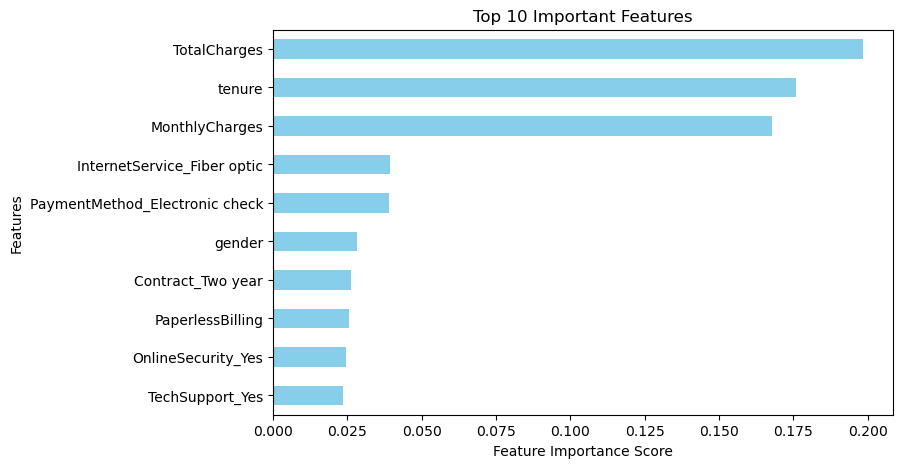

In [16]:
plt.figure(figsize=(8,5))
important_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### Feature Importance using Random Forest

A Random Forest Classifier was used to identify the most important features that influence customer churn.

The model assigns an importance score to each feature based on how much it contributes to the prediction.

The top 10 most important features were visualized using a horizontal bar chart for better interpretation.


# 8-Ranking the Features using RFE

In [17]:
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

for i, col in enumerate(X.columns):
    print(f"{col} selected={rfe.support_[i]}, rank={rfe.ranking_[i]}")


gender selected=True, rank=1
SeniorCitizen selected=False, rank=5
Partner selected=False, rank=2
Dependents selected=False, rank=8
tenure selected=True, rank=1
PhoneService selected=False, rank=16
PaperlessBilling selected=True, rank=1
MonthlyCharges selected=True, rank=1
TotalCharges selected=True, rank=1
MultipleLines_No phone service selected=False, rank=21
MultipleLines_Yes selected=False, rank=6
InternetService_Fiber optic selected=True, rank=1
InternetService_No selected=False, rank=17
OnlineSecurity_No internet service selected=False, rank=11
OnlineSecurity_Yes selected=True, rank=1
OnlineBackup_No internet service selected=False, rank=15
OnlineBackup_Yes selected=False, rank=4
DeviceProtection_No internet service selected=False, rank=18
DeviceProtection_Yes selected=False, rank=7
TechSupport_No internet service selected=False, rank=14
TechSupport_Yes selected=False, rank=3
StreamingTV_No internet service selected=False, rank=20
StreamingTV_Yes selected=False, rank=10
StreamingM

In [18]:
feature_names = X.columns  #feature names
selected=rfe.support_   # boolean array of selected features
ranks=rfe.ranking_  # ranking of features

rfe_results = pd.DataFrame({'Feature': feature_names, 'Selected': selected, 'Rank': ranks})

rfe_results=rfe_results.sort_values(by='Rank')
rfe_results 

,Feature,Selected,Rank
0,gender,True,1
26,Contract_Two year,True,1
25,Contract_One year,True,1
28,PaymentMethod_Electronic check,True,1
11,InternetService_Fiber optic,True,1
8,TotalCharges,True,1
7,MonthlyCharges,True,1
14,OnlineSecurity_Yes,True,1
4,tenure,True,1
6,PaperlessBilling,True,1


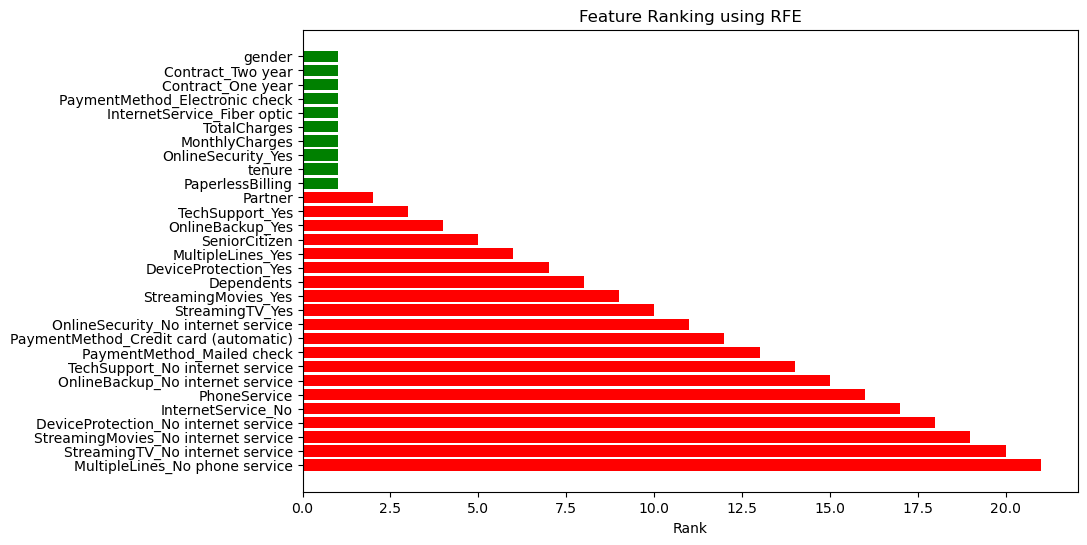

In [19]:
#plotting the results

plt.figure(figsize=(10,6))
plt.barh(rfe_results['Feature'], rfe_results['Rank'], color=rfe_results['Selected'].map({True: 'green', False: 'red'}))
plt.xlabel('Rank')
plt.title('Feature Ranking using RFE')
plt.gca().invert_yaxis() #invert y-axis to have the best features on top
plt.show()   

# 9-Identifying Relevant Feature By Correlation Matrix

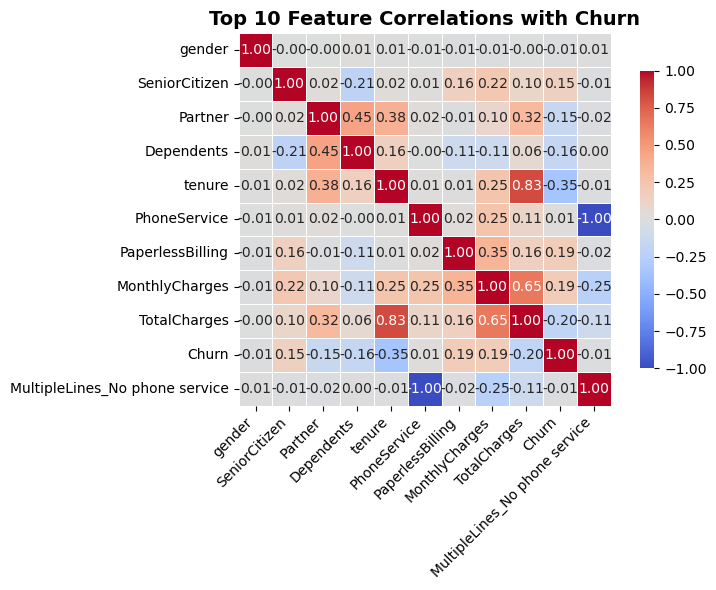

In [40]:
# Select only numeric features
numeric_df = data.select_dtypes(include=['int64', 'float64']).copy()

# Ensure Churn is numeric binary (1 for Yes, 0 for No)
numeric_df['Churn_Binary'] = (data['Churn'] == 'Yes').astype(int)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Select top 10 features most correlated with Churn
top_features = correlation_matrix['Churn_Binary'].abs().sort_values(ascending=False).head(11).index

# Plot clean heatmap for only top features
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix.loc[top_features, top_features],
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Top 10 Feature Correlations with Churn', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## 🧠 Feature Engineering Decisions & Key Insights

### 1. Data Preparation
- Loaded preprocessed dataset containing demographic, service usage, and billing features.
- Target variable identified as **`Churn`** (binary: 0 = No churn, 1 = Churn).

### 3. Feature Engineering
- **Interaction Features:** Derived features combining service-related variables (e.g., InternetService + StreamingTV) to better capture customer behavior.
- **Numerical Normalization:** Scaled continuous variables such as `tenure`, `MonthlyCharges`, and `TotalCharges` to improve model training stability.
- **Feature Selection:** Removed redundant columns like “No internet service” after encoding to avoid multicollinearity.

### 4. Insights from Data Exploration
- Customers with **short tenure** and **high monthly charges** show higher churn likelihood.
- **Long-term contracts** and **automatic payment methods** reduce churn probability.
- **Tech support and online security** features are strong retention indicators.

### 5. Summary
The resulting dataset is fully numeric, balanced in feature representation, and optimized for modeling. These transformations aim to enhance model interpretability, reduce noise, and improve predictive accuracy.
